In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from datetime import datetime, timedelta
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
train_df = pd.read_csv('../../datasets/training_2nd_dataset.csv')
train_df['identifier'] = train_df['domain_name'] +'-'+ train_df['city'] +'-'+ train_df['isp'] +'-'+ train_df['node_name']

used_idx = train_df['identifier'].value_counts().index.tolist()[:-11547]
train_filtered = train_df.loc[train_df['identifier'].isin(used_idx)].copy()

In [4]:
train_filtered['identifier'].value_counts()

domain_10-city_7-isp_10-node_192      21292
domain_8-city_7-isp_10-node_192       21276
domain_12-city_7-isp_10-node_192      21152
domain_6-city_18-isp_11-node_475      20397
domain_10-city_24-isp_10-node_257     20378
                                      ...  
domain_4-city_20-isp_11-node_179       2009
domain_10-city_27-isp_11-node_1211     2006
domain_8-city_27-isp_11-node_1211      2005
domain_8-city_16-isp_10-node_303       2003
domain_10-city_13-isp_12-node_195      2002
Name: identifier, Length: 1331, dtype: int64

In [6]:
domain_lst = ['domain_4','domain_6','domain_8','domain_10', 'domain_12','domain_16','domain_18','domain_20']

bt_datas = []
dr_datas = []
for i in domain_lst:
    tmp = train_filtered[train_filtered['domain_name'] == i]
    bt_datas.append(tmp['avg_fbt_time'].values)
    dr_datas.append(tmp['inner_network_droprate'].values)

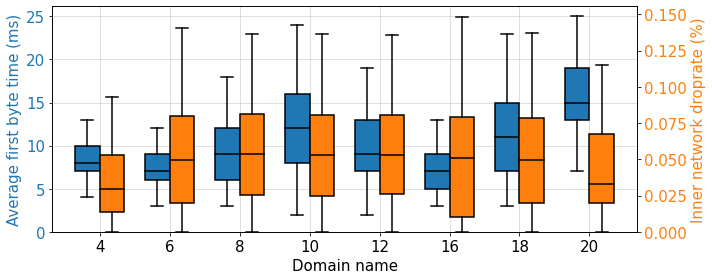

In [7]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
hatchs = ['', '/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

fig, axs = plt.subplots(1, 1, figsize = (10, 4))

dl = [i.split('_')[1] for i in domain_lst]
x = np.arange(len(dl))
width = 0.35
wid=0.4
lw = 1.5

plt.rcParams['hatch.linewidth'] = 2.5
ax3 = axs
ax2 = ax3.twinx()
b1 = ax3.boxplot(bt_datas,positions=x-width/2, vert=True,widths=width, labels=dl, whis=1, showfliers=False, notch=False, 
            whiskerprops=dict(linewidth=lw),capprops=dict(linewidth=lw),medianprops=dict(linewidth=lw, color='black'),
            boxprops=dict(linewidth=lw),patch_artist=True,)
b2 = ax2.boxplot(dr_datas,positions=x+width/2, vert=True,widths=width, labels=dl, whis=1, showfliers=False, notch=False,
                 whiskerprops=dict(linewidth=lw),capprops=dict(linewidth=lw),medianprops=dict(linewidth=lw, color='black'),
                 boxprops=dict(linewidth=lw),patch_artist=True,)

# fill with colors
for patch in b1['boxes']:
     patch.set_facecolor(colors[0])
for patch in b2['boxes']:
     patch.set_facecolor(colors[1])


ax2.set_ylabel('Inner network droprate (%)', color=colors[1], fontsize=15)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=colors[1], labelsize=15)
ax3.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
ax3.grid(alpha=0.5)
ax3.tick_params(axis='y', labelcolor=colors[0])
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.set_xlabel('Domain name' , fontsize=15)
ax3.set_ylabel('Average first byte time (ms)', color=colors[0],fontsize=15)
ax3.set_xticks(x, dl)
fig.tight_layout()

# fig.savefig('./qos_boxplot.pdf')